'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] 1470   35

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


'data.frame':	1470 obs. of  25 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...
 $ JobInvolvement          : int  3 2 2 3 3 3 4 3 2 3 ...
 $ JobLevel                : int  2 2 1 1 1 1 1 1 3 2 ...
 $ JobSatisfaction         : int  4 2 3 3 2 4 1 3 3 3 ...
 $ MonthlyIncome           : int  5993 5130 2090 2909 3468 3068 2670 2693 9526 5237 ...
 $ MonthlyRate             : int  19479 24907 2396 23159 16632 11864 9964 13335 8787 16577 ...
 $ NumCompaniesWorked      : int  8 1 6 1 9 0 4 1 0 6 ...
 $ PercentSalaryHike       : int  11 23 15 11 12 13 20 22 21 13 ...
 $ PerformanceR

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


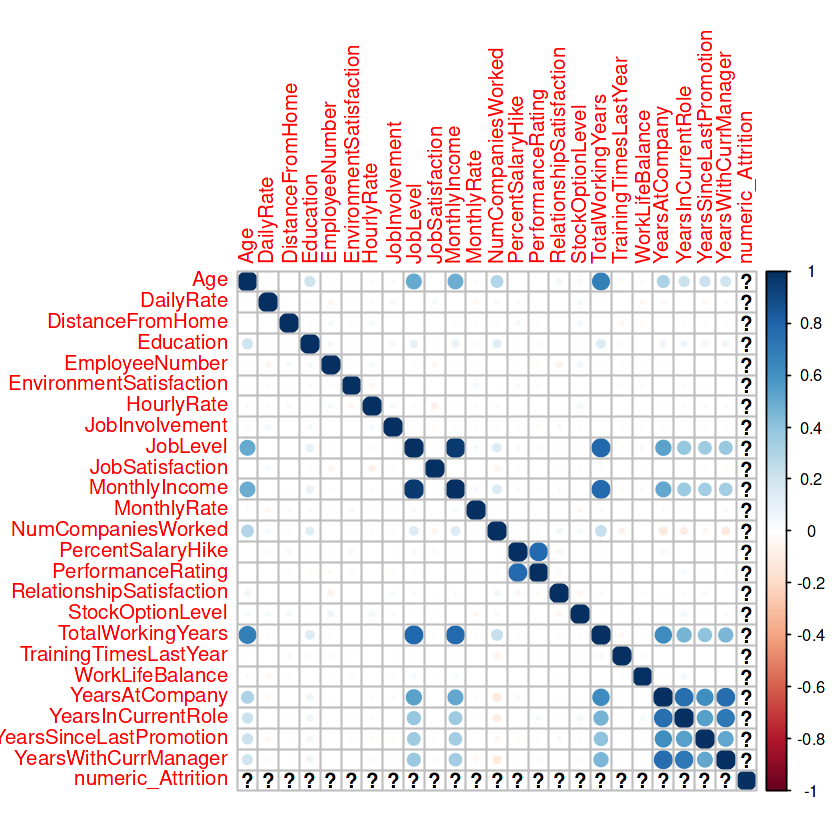

Warning message in tapply(as.numeric(mydata$Attrition) - 1, mydata$OverTime, mean):
“NAs introduced by coercion”


No Yes 
 NA  NA

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


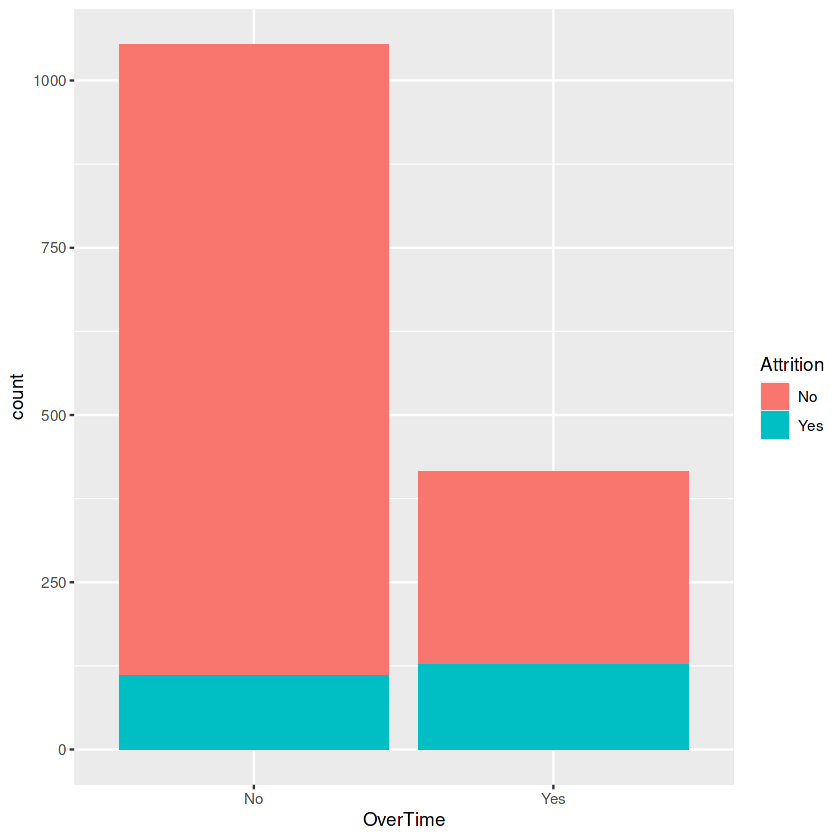

Warning message in tapply(as.numeric(mydata$Attrition) - 1, mydata$MaritalStatus, :
“NAs introduced by coercion”


Divorced  Married   Single 
      NA       NA       NA

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


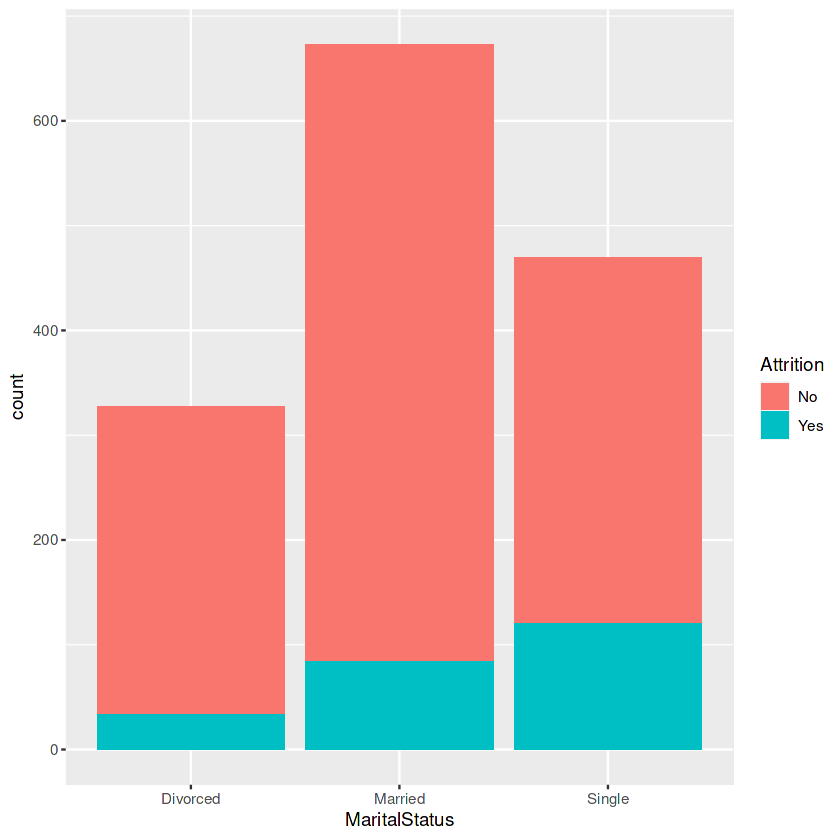

Warning message in tapply(as.numeric(mydata$Attrition) - 1, mydata$JobRole, mean):
“NAs introduced by coercion”


Healthcare Representative           Human Resources     Laboratory Technician 
                       NA                        NA                        NA 
                  Manager    Manufacturing Director         Research Director 
                       NA                        NA                        NA 
       Research Scientist           Sales Executive      Sales Representative 
                       NA                        NA                        NA

Warning message in mean(as.numeric(mydata$Attrition) - 1):
“NAs introduced by coercion”


[1] NA

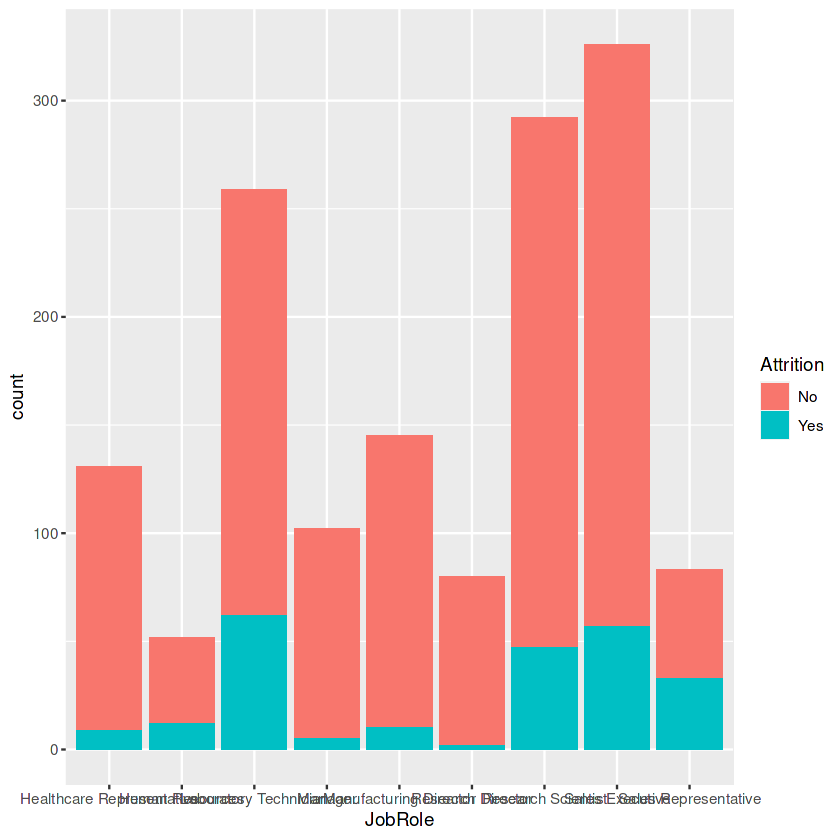

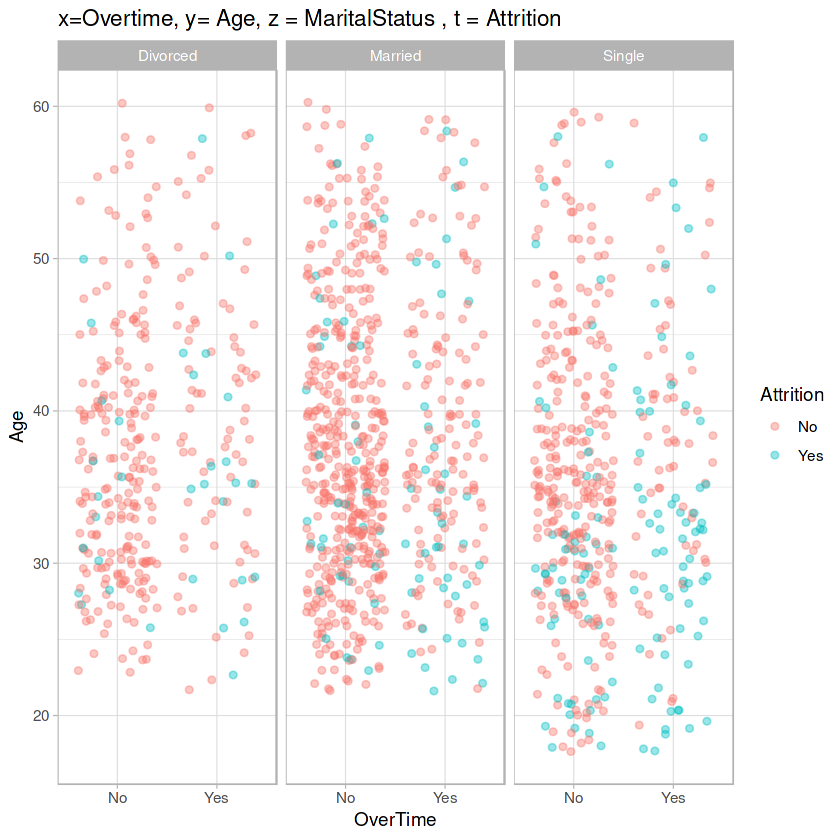

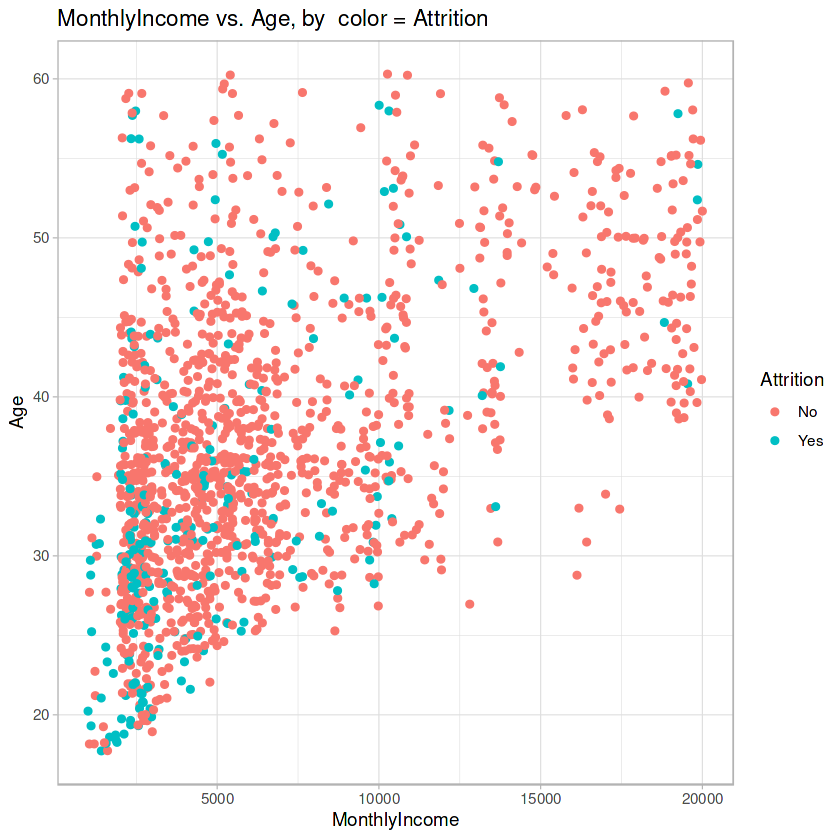

In [3]:
mydata <- read.csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
library(dplyr)
library(ggplot2)
library(ggthemes)

str(mydata)

dim(mydata)

numeric_mydata <- mydata[,c(1,4,6,7,10,11,13,14,15,17,19,20,21,24,25,26,28:35)]
numeric_Attrition = as.numeric(mydata$Attrition)- 1
numeric_mydata = cbind(numeric_mydata, numeric_Attrition)
str(numeric_mydata)
library(corrplot)
M <- cor(numeric_mydata)
corrplot(M, method="circle")

### Overtime vs Attiriton
l <- ggplot(mydata, aes(OverTime,fill = Attrition))
l <- l + geom_histogram(stat="count")
print(l)
tapply(as.numeric(mydata$Attrition) - 1 ,mydata$OverTime,mean)

### MaritalStatus vs Attiriton
l <- ggplot(mydata, aes(MaritalStatus,fill = Attrition))
l <- l + geom_histogram(stat="count")
print(l)
tapply(as.numeric(mydata$Attrition) - 1 ,mydata$MaritalStatus,mean)

###JobRole vs Attrition
l <- ggplot(mydata, aes(JobRole,fill = Attrition))
l <- l + geom_histogram(stat="count")
print(l)
tapply(as.numeric(mydata$Attrition) - 1 ,mydata$JobRole,mean)
mean(as.numeric(mydata$Attrition) - 1)

### x=Overtime, y= Age, z = MaritalStatus , t = Attrition
ggplot(mydata, aes(OverTime, Age)) +  
  facet_grid(.~MaritalStatus) +
  geom_jitter(aes(color = Attrition),alpha = 0.4) +  
  ggtitle("x=Overtime, y= Age, z = MaritalStatus , t = Attrition") +  
  theme_light()

### MonthlyIncome vs. Age, by  color = Attrition
ggplot(mydata, aes(MonthlyIncome, Age, color = Attrition)) + 
  geom_jitter() +
  ggtitle("MonthlyIncome vs. Age, by  color = Attrition ") +
  theme_light()